In [336]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, ZeroPadding2D, BatchNormalization

In [335]:
#Settings
width = 28
height = 28
num_classes = 3
num_batches = 16
learning_rate = 0.000001
validation_split = 0.2
epochs = 200
seed = 2021
dataset_path = '../input/basicshapes/shapes/shapes/'

In [337]:
#Image generators for both train and validation sets
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = validation_split,
)

val_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = validation_split,
)

In [338]:
#Load data from folder
train_dataset = train_datagen.flow_from_directory(
    dataset_path, 
    batch_size = num_batches, 
    target_size = (width, height), 
    subset = "training",
    color_mode="grayscale",
    seed = seed,
)

validation_dataset = val_datagen.flow_from_directory(
    dataset_path, 
    batch_size = num_batches, 
    target_size = (width, height), 
    subset = "validation",
    color_mode="grayscale",
    seed = seed
)

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


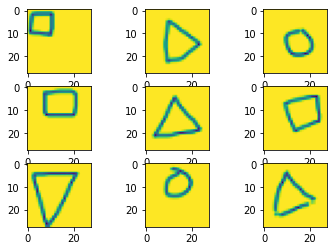

In [339]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_dataset[0][0][i])

In [375]:
#Create model structure
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, activation="relu", padding="same", input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation="softmax")
])

In [376]:
#Compile model
optimizer = keras.optimizers.Adam()
loss = keras.losses.CategoricalCrossentropy()
model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy","Recall", "Precision"])

In [373]:
#Create callbacks: 
#EarlyStopping to prevent overfitting and checkpoints to save models. We try to maximize validation dataset accuracy
#ReduceLROnPLateau is callback which reduces learning rate in time (when model has difficulties to pass some loss)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=6, min_lr=0.001)
checkpoints = keras.callbacks.ModelCheckpoint("mode.h5", monitor='val_accuracy', mode="max")
earlystop = keras.callbacks.EarlyStopping(monitor='val_accuracy', mode="max", patience=12)

In [377]:
#Train model and save history
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs,callbacks=[checkpoints, earlystop, reduce_lr])

Epoch 1/200
15/15 [==============================] - 3s 104ms/step - loss: 1.1150 - accuracy: 0.3265 - recall: 0.0383 - precision: 0.2815 - val_loss: 1.1003 - val_accuracy: 0.3333 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/200
15/15 [==============================] - 1s 79ms/step - loss: 1.1032 - accuracy: 0.3544 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0988 - val_accuracy: 0.3333 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/200
15/15 [==============================] - 1s 85ms/step - loss: 1.0991 - accuracy: 0.3073 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0985 - val_accuracy: 0.3333 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/200
15/15 [==============================] - 1s 74ms/step - loss: 1.0979 - accuracy: 0.3323 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0987 - val_accuracy: 0.3667 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/200
15/15 [============================

In [378]:
model.evaluate(train_dataset)

15/15 [==============================] - 0s 20ms/step - loss: 0.0346 - accuracy: 0.9917 - recall: 0.9833 - precision: 0.9958


[0.03457152843475342,
 0.9916666746139526,
 0.9833333492279053,
 0.9957805871963501]

In [379]:
model.evaluate(validation_dataset)

4/4 [==============================] - 0s 19ms/step - loss: 0.0555 - accuracy: 0.9667 - recall: 0.9667 - precision: 0.9667


[0.05548548698425293,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658]

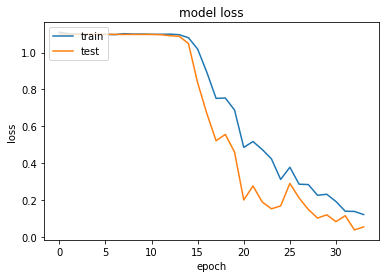

In [380]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

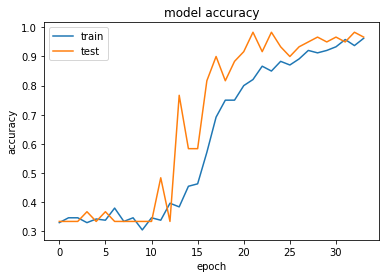

In [381]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [382]:
#Turn off shuffling to get reliable results
train_dataset.shuffle = False
validation_dataset.shuffle = False

In [387]:
#Get classification report
from sklearn.metrics import classification_report

predicted = np.argmax(model.predict(train_dataset), axis=-1)
true = train_dataset.classes
cm = classification_report(true, predicted)

In [388]:
print(cm)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        80
           1       1.00      0.99      0.99        80
           2       1.00      0.99      0.99        80

    accuracy                           0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240

